<a href="https://colab.research.google.com/github/Thiru2208/Telco-Customer-Churn-ML-Coursework/blob/main/2425449_20241152_Thirusha_Kannathasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import libraries and load data**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

#Make platos look a bit nicer by default
sns.set(style = "whitegrid")

In [55]:
drive.mount('/content/drive')

#Load the Telco churn dataset
path = "/content/drive/MyDrive/ML Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Exploratory Data Analysis (EDA**)

Basic structure: shape, info, summary

In [56]:
#Quick peek at the first few records
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [57]:
#Overall size of the data (rows, columns)
print("Shape of the data:", data.shape)

Shape of the data: (7043, 21)


In [58]:
print("\nDataFrame Info")
print(data.info())


DataFrame Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non

In [59]:
print("\nDescriptive stats (numeric columns)")
print(data.describe())


Descriptive stats (numeric columns)
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [60]:
# Count how many duplicate rows appear in the data
print("Duplicate rows in the data")
print(data.duplicated().sum())

Duplicate rows in the data
0


In [61]:
print(data.columns.tolist())
len(data.columns)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


21

Check missing values

In [62]:
#Count how many missing values apperar in each column
print("\n Missing values per colums")
print(data.isnull().sum())


 Missing values per colums
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [63]:
print(data.isna().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [64]:
for column in data.columns:
    blank_mask = data[column].astype(str).str.strip() == ""
    num_blanks = blank_mask.sum()

    print(f"{column}: {num_blanks}")

    if num_blanks > 0:
        print(f"\nRows containing empty values in '{column}':")
        display(data[blank_mask])

customerID: 0
gender: 0
SeniorCitizen: 0
Partner: 0
Dependents: 0
tenure: 0
PhoneService: 0
MultipleLines: 0
InternetService: 0
OnlineSecurity: 0
OnlineBackup: 0
DeviceProtection: 0
TechSupport: 0
StreamingTV: 0
StreamingMovies: 0
Contract: 0
PaperlessBilling: 0
PaymentMethod: 0
MonthlyCharges: 0
TotalCharges: 11

Rows containing empty values in 'TotalCharges':


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


Churn: 0


In [65]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [66]:
# Checking unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique())
    print()
    print(data[col].value_counts())
    print()
    print()


Unique Values in Categorical Columns:

customerID: 7043 unique values
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


gender: 2 unique values
['Female' 'Male']

gender
Male      3555
Female    3488
Name: count, dtype: int64


Partner: 2 unique values
['Yes' 'No']

Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents: 2 unique values
['No' 'Yes']

Dependents
No     4933
Yes    2110
Name: count, dtype: int64


PhoneService: 2 unique values
['No' 'Yes']

PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetServ

In [67]:
# Count of 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data[col] == 'unknown').sum()
    total_count = len(data)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")


Processing column: customerID
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: gender
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Partner
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Dependents
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: PhoneService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: MultipleLines
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: InternetService
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineSecurity
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: OnlineBackup
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: DeviceProtection
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: TechSupport
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingTV
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: StreamingMovies
  'unknown' values: 0 out of 7043 (0.00%)

Processing column: Contract


In [68]:
#Target Variable
# Count how many customers fall into each class (Yes/No)
churn_counts = data["Churn"].value_counts()
print("\n--- Churn counts ---")
print(churn_counts)


--- Churn counts ---
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [69]:
# Percentage for each class
churn_pct = churn_counts / len(data) * 100
print("\n--- Churn percentage ---")
print(churn_pct)


--- Churn percentage ---
Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64


#**Data Visualization**

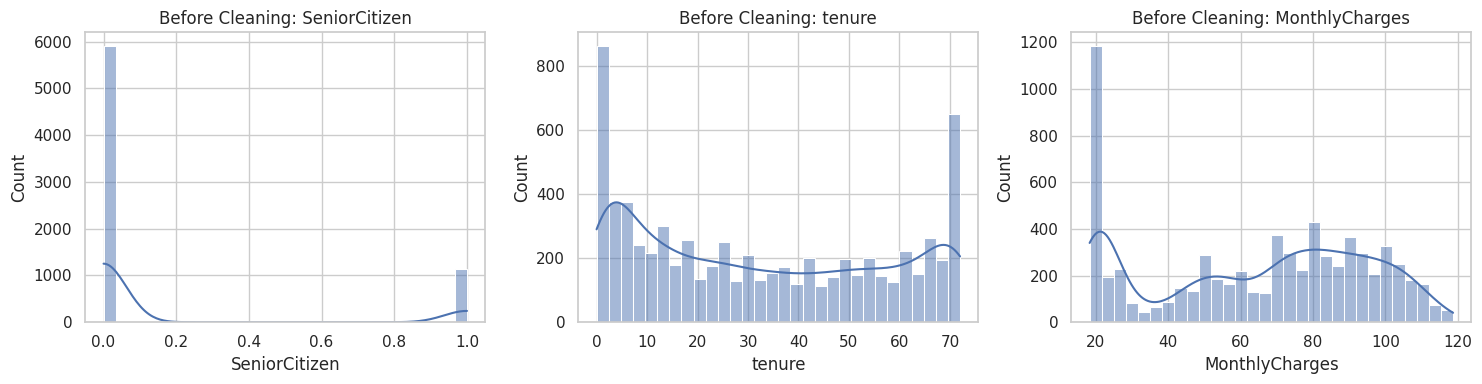

In [70]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Before Cleaning: {col}")
plt.tight_layout()
plt.show()


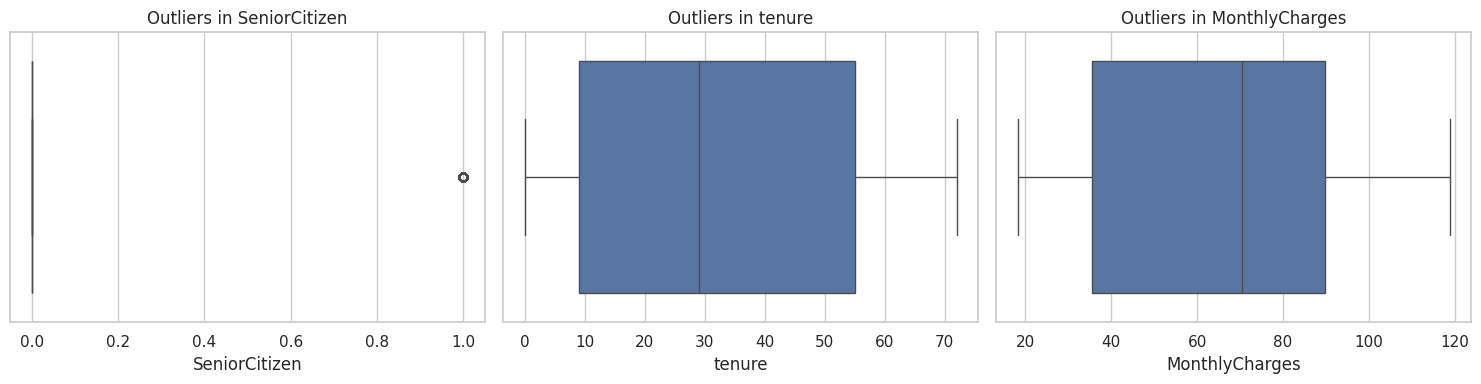

In [71]:
plt.figure(figsize=(15,4))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=data[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()


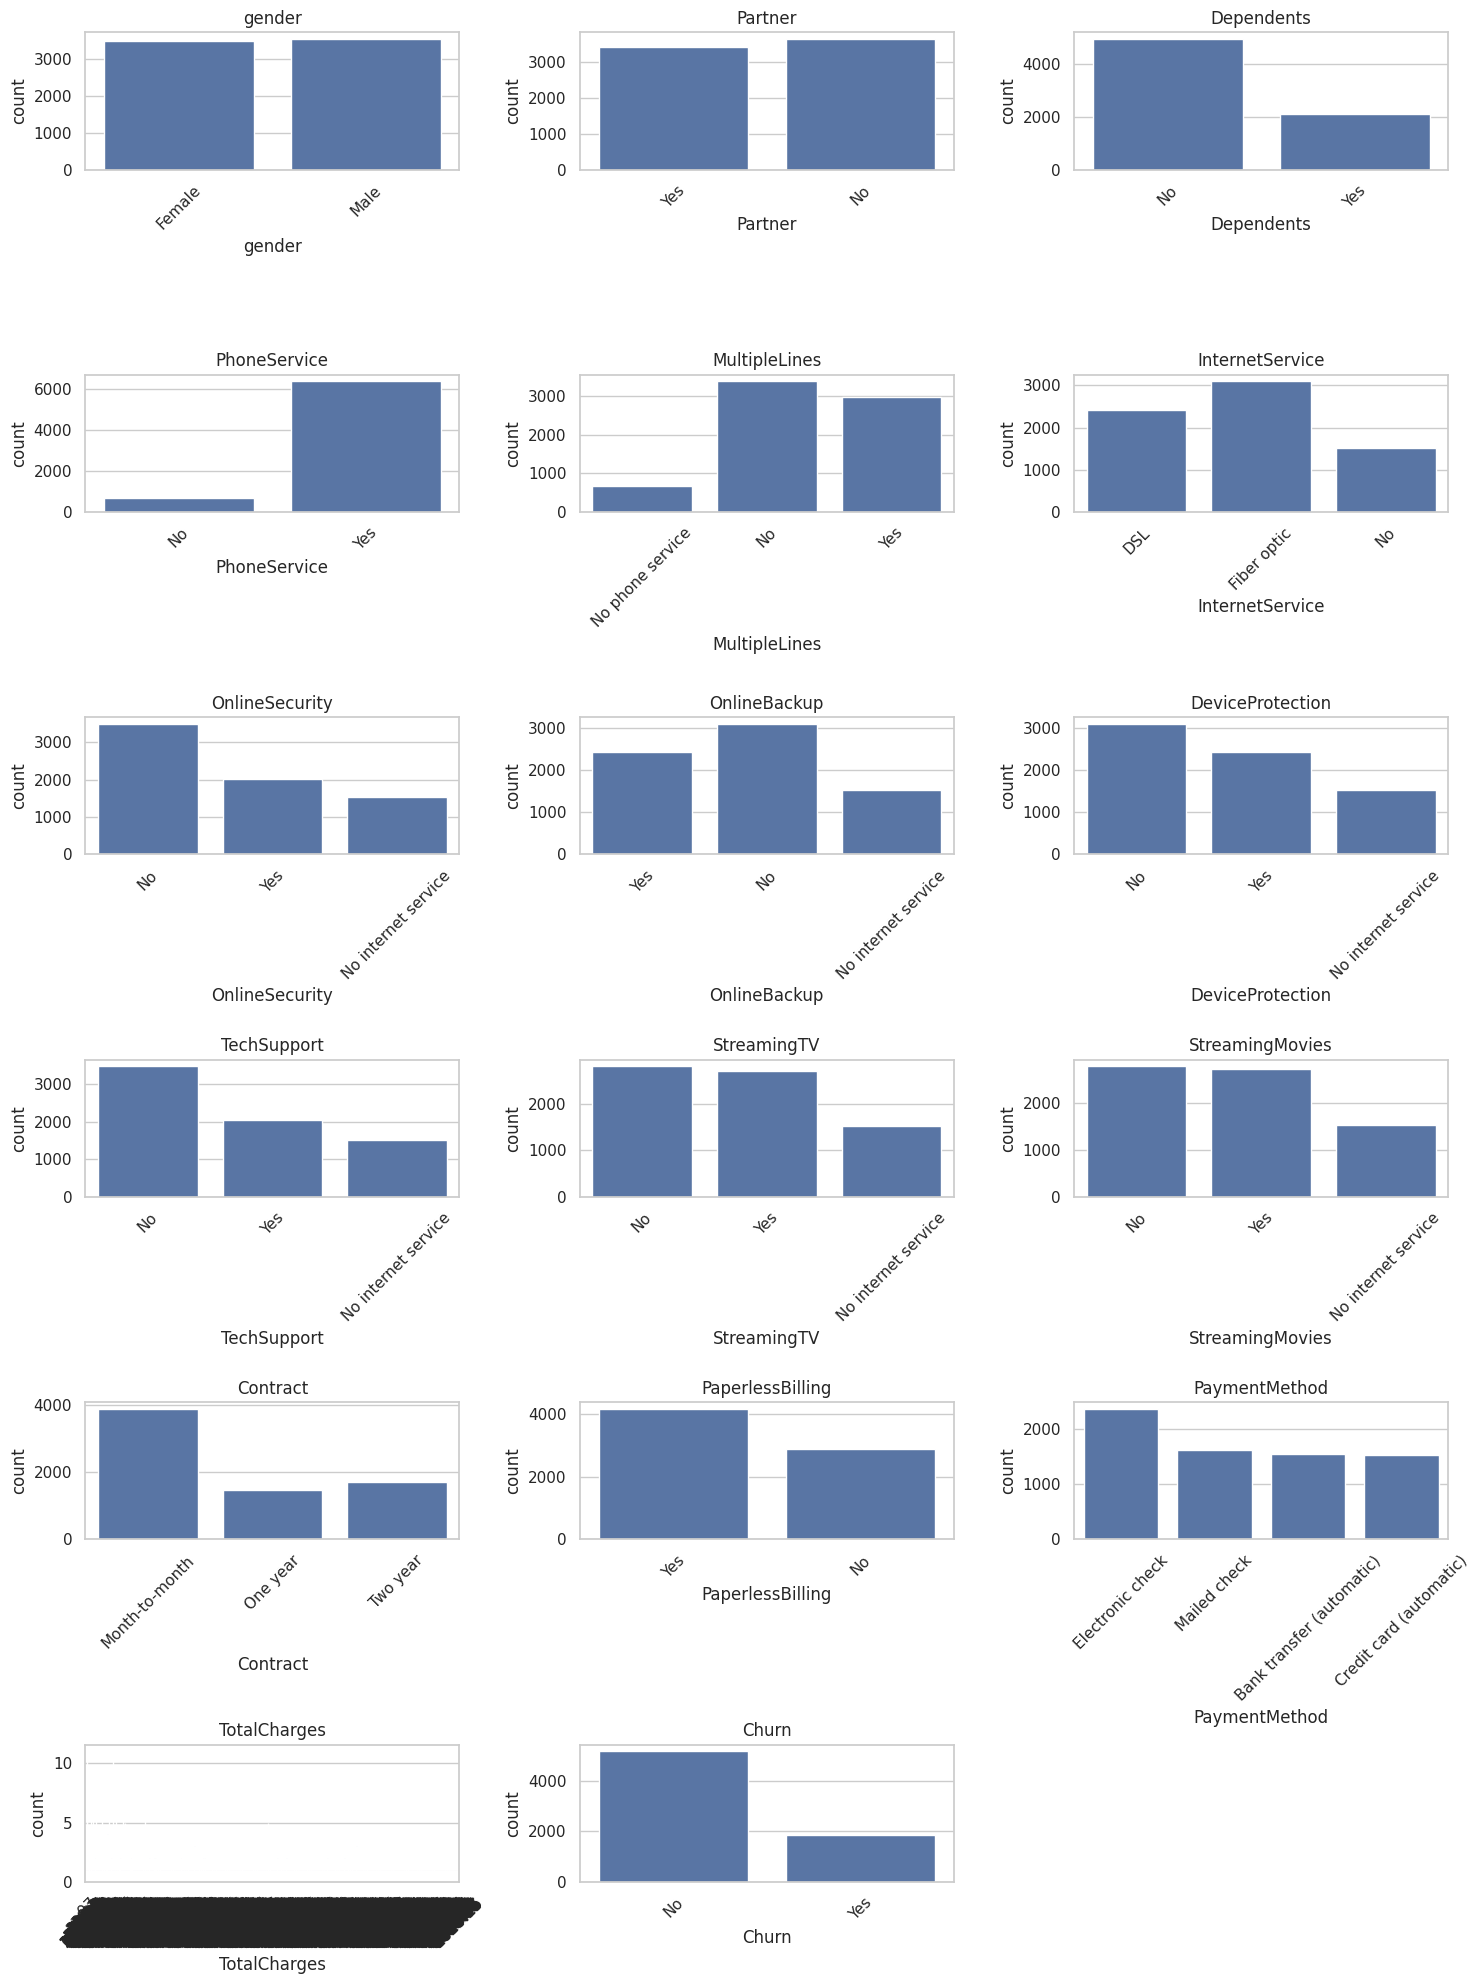

In [72]:
# Categorical Feature Distribution
categorical_cols = [c for c in data.columns if data[c].dtype == "O" and c != "customerID"]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 3, i)
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


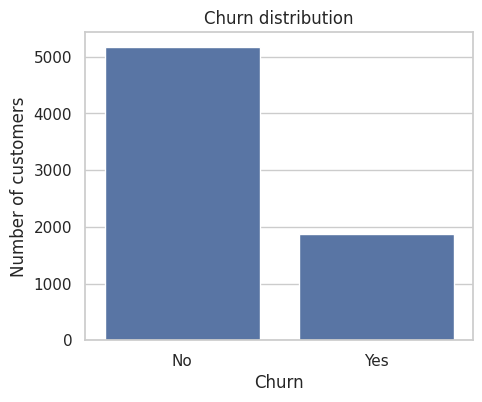

In [73]:
# Bar plot of churn variable
plt.figure(figsize=(5, 4))
sns.countplot(x="Churn", data=data)
plt.title("Churn distribution")
plt.xlabel("Churn")
plt.ylabel("Number of customers")
plt.show()

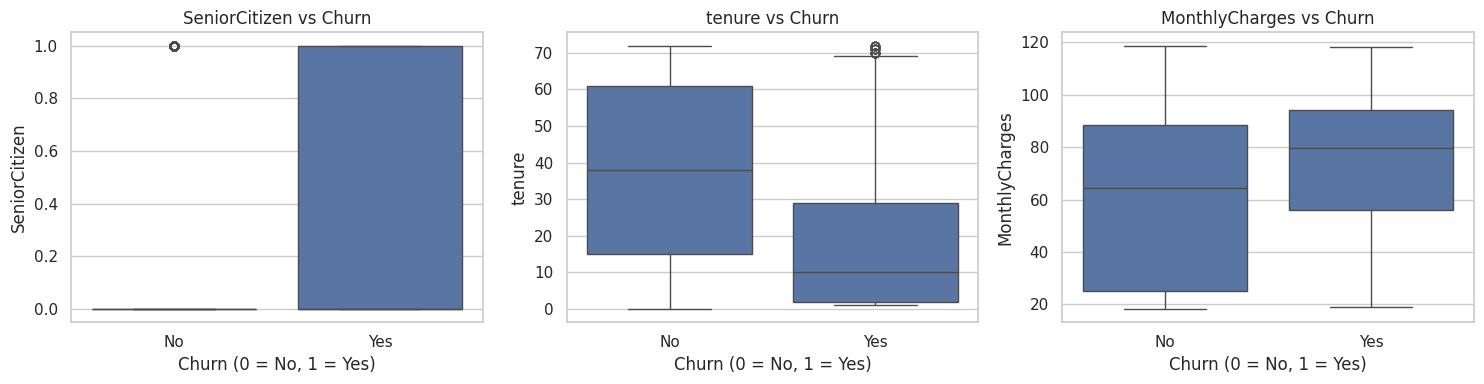

In [74]:
num_cols = data.select_dtypes(include=['int64','float64']).columns

# Exclude the target variable 'Churn' from plotting
num_cols = [col for col in num_cols if col != 'Churn']

# Boxplots for each numerical column vs Churn
plt.figure(figsize=(15,4)) # Create one figure for all subplots
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i) # 1 row, 3 columns, i-th subplot
    sns.boxplot(x=data['Churn'], y=data[col])
    plt.title(f"{col} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()


Churn percentages for: gender
Churn          No        Yes
gender                      
Female  73.079128  26.920872
Male    73.839662  26.160338


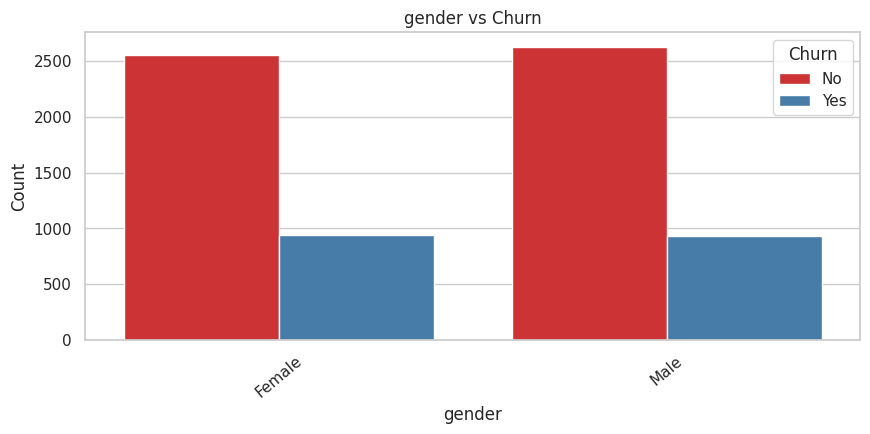


Churn percentages for: Partner
Churn           No        Yes
Partner                      
No       67.042021  32.957979
Yes      80.335097  19.664903


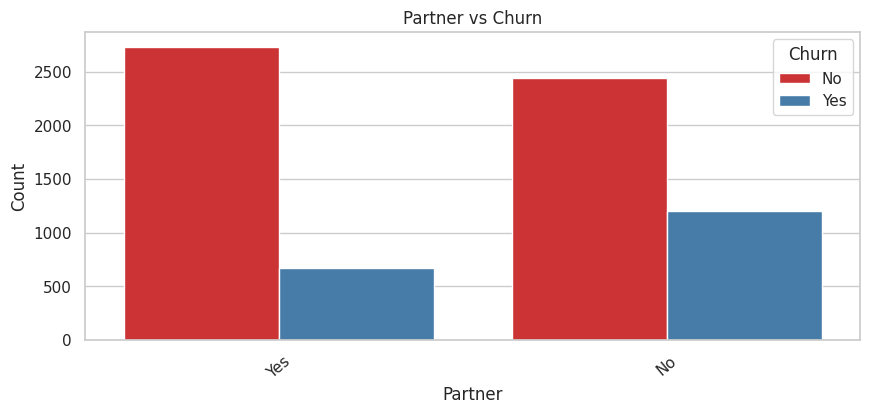


Churn percentages for: Dependents
Churn              No        Yes
Dependents                      
No          68.720860  31.279140
Yes         84.549763  15.450237


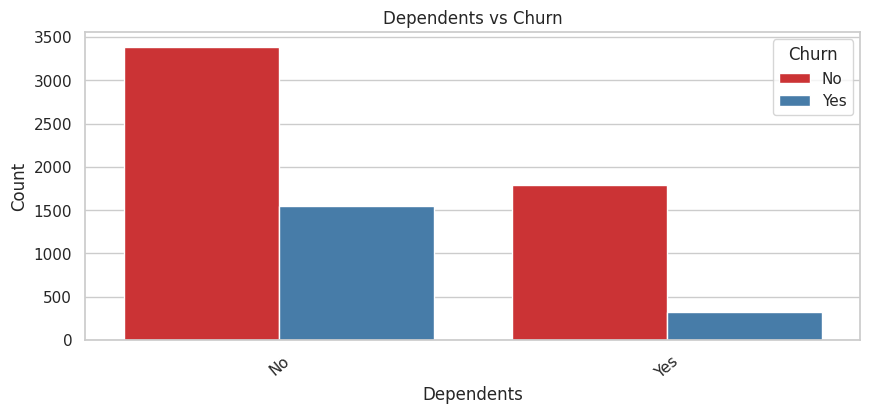


Churn percentages for: PhoneService
Churn                No        Yes
PhoneService                      
No            75.073314  24.926686
Yes           73.290363  26.709637


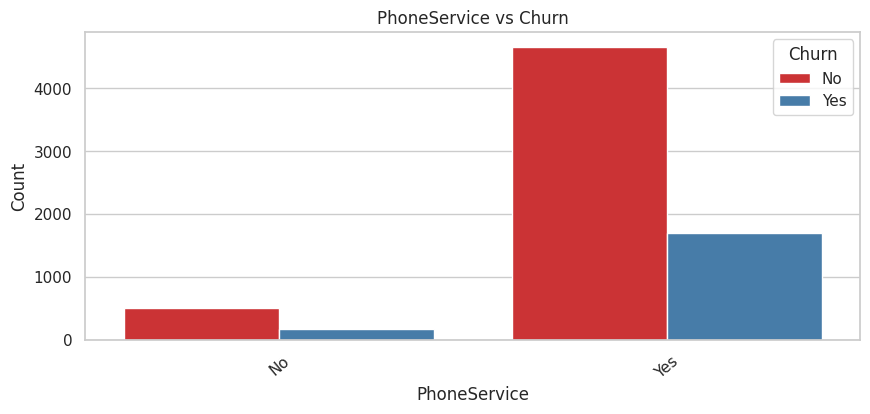


Churn percentages for: MultipleLines
Churn                    No        Yes
MultipleLines                         
No                74.955752  25.044248
No phone service  75.073314  24.926686
Yes               71.390104  28.609896


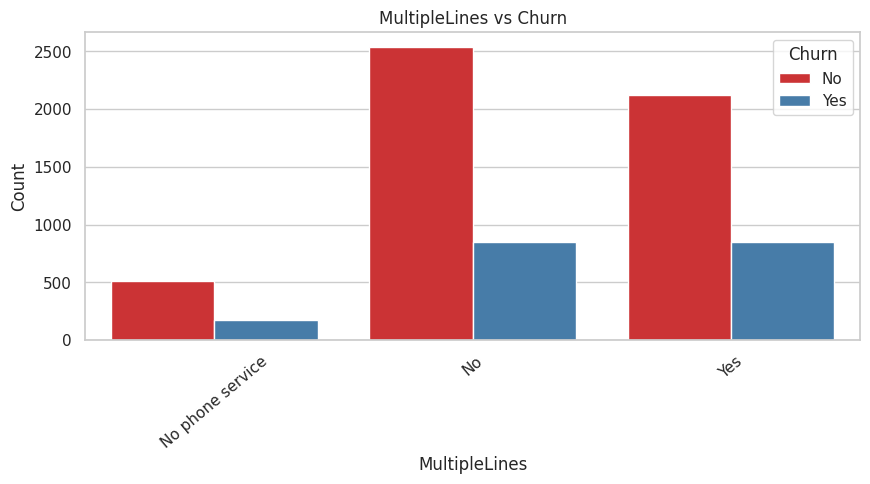


Churn percentages for: InternetService
Churn                   No        Yes
InternetService                      
DSL              81.040892  18.959108
Fiber optic      58.107235  41.892765
No               92.595020   7.404980


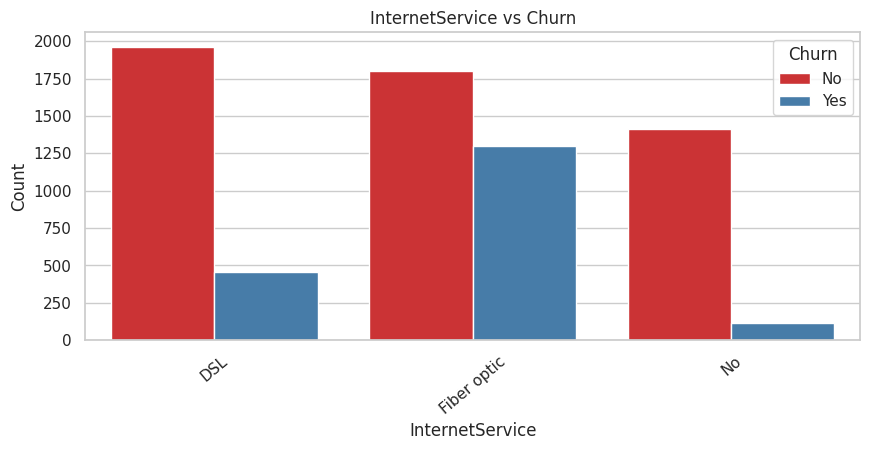


Churn percentages for: OnlineSecurity
Churn                       No        Yes
OnlineSecurity                           
No                   58.233276  41.766724
No internet service  92.595020   7.404980
Yes                  85.388806  14.611194


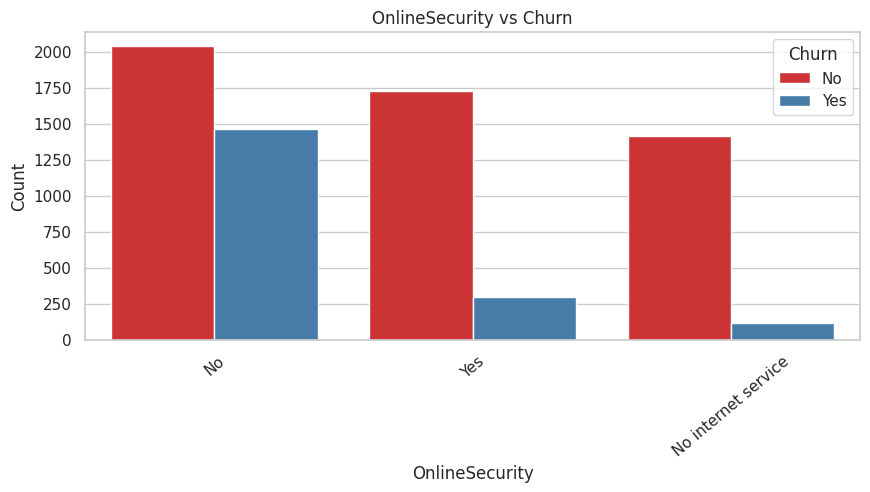


Churn percentages for: OnlineBackup
Churn                       No        Yes
OnlineBackup                             
No                   60.071244  39.928756
No internet service  92.595020   7.404980
Yes                  78.468506  21.531494


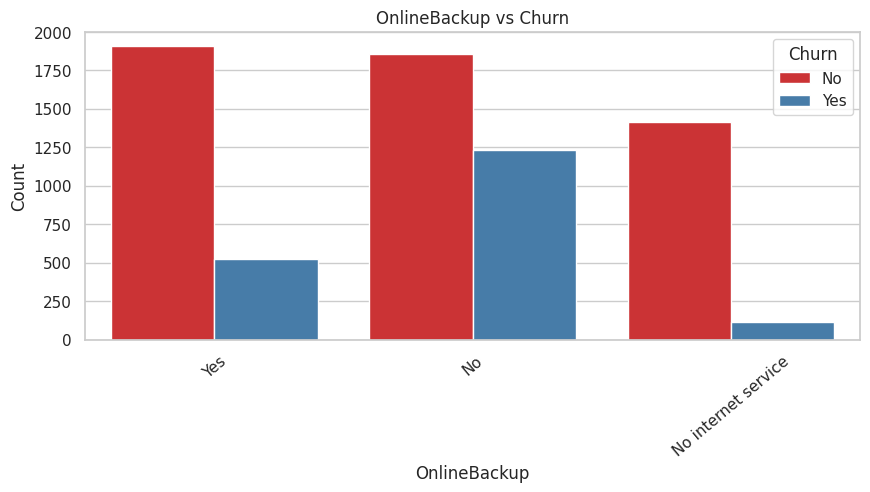


Churn percentages for: DeviceProtection
Churn                       No        Yes
DeviceProtection                         
No                   60.872375  39.127625
No internet service  92.595020   7.404980
Yes                  77.497936  22.502064


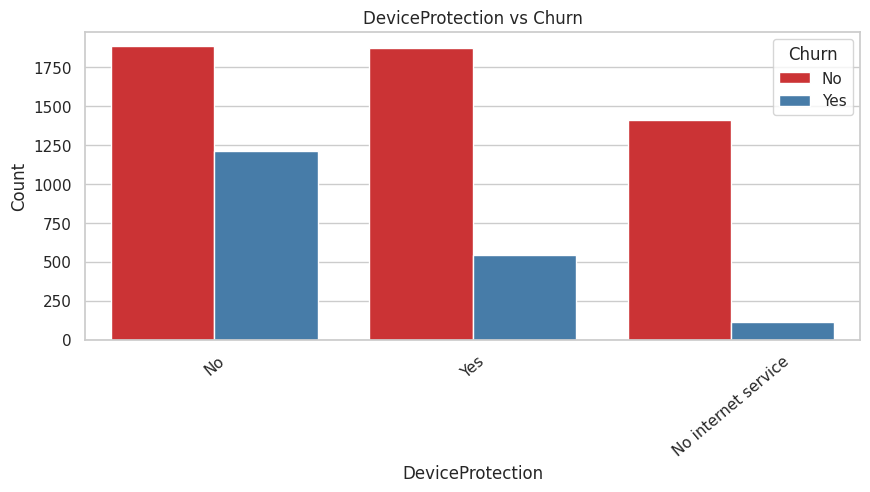


Churn percentages for: TechSupport
Churn                       No        Yes
TechSupport                              
No                   58.364526  41.635474
No internet service  92.595020   7.404980
Yes                  84.833659  15.166341


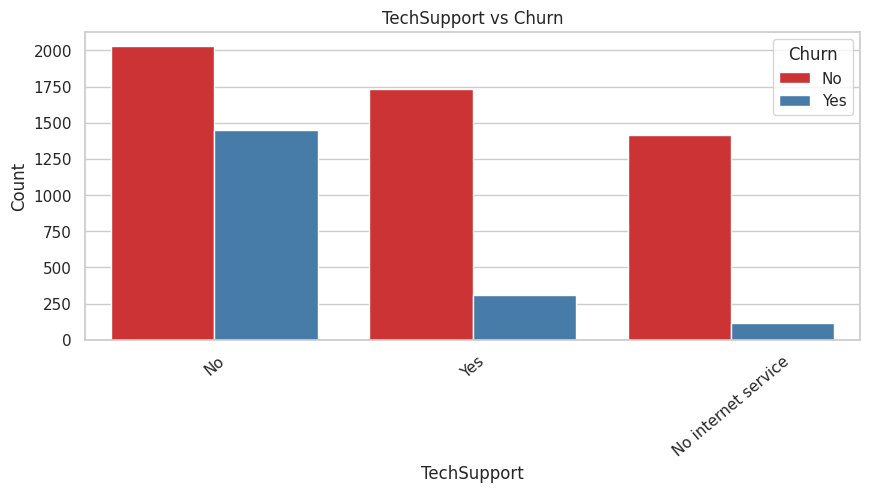


Churn percentages for: StreamingTV
Churn                       No        Yes
StreamingTV                              
No                   66.476868  33.523132
No internet service  92.595020   7.404980
Yes                  69.929812  30.070188


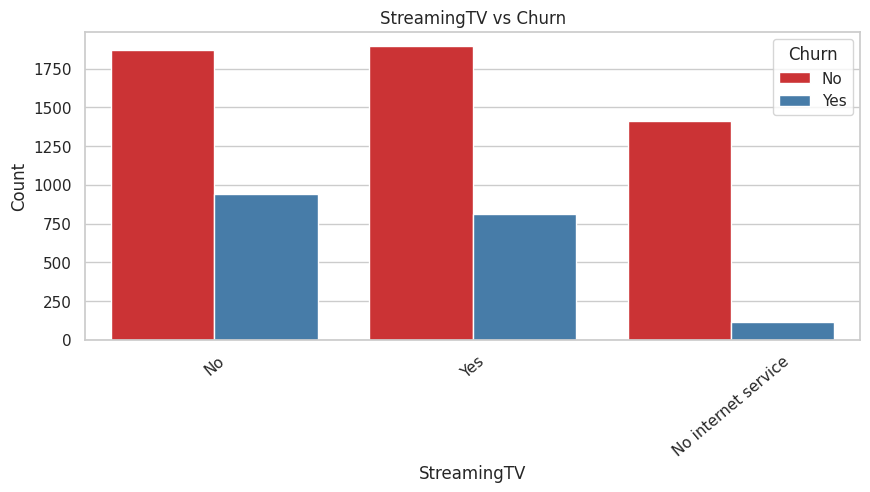


Churn percentages for: StreamingMovies
Churn                       No        Yes
StreamingMovies                          
No                   66.319569  33.680431
No internet service  92.595020   7.404980
Yes                  70.058565  29.941435


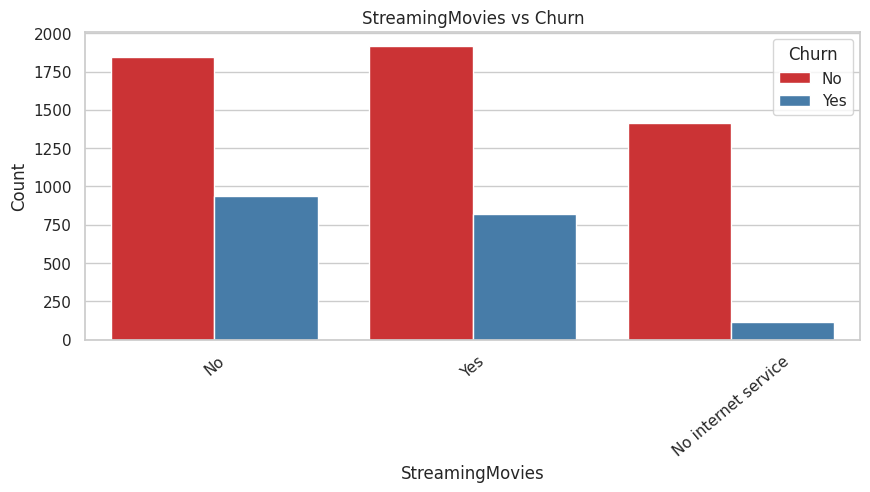


Churn percentages for: Contract
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


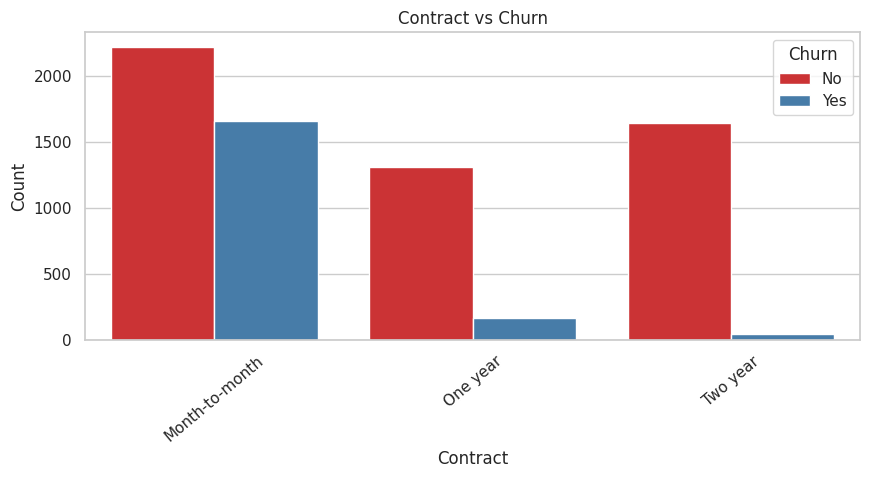


Churn percentages for: PaperlessBilling
Churn                    No        Yes
PaperlessBilling                      
No                83.669916  16.330084
Yes               66.434908  33.565092


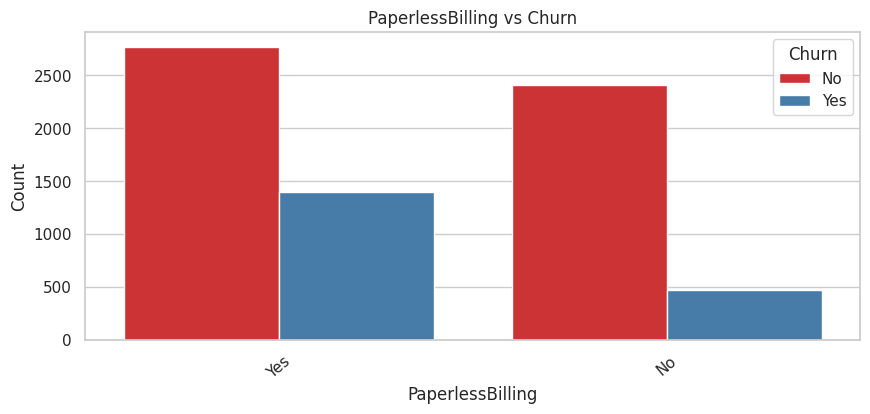


Churn percentages for: PaymentMethod
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


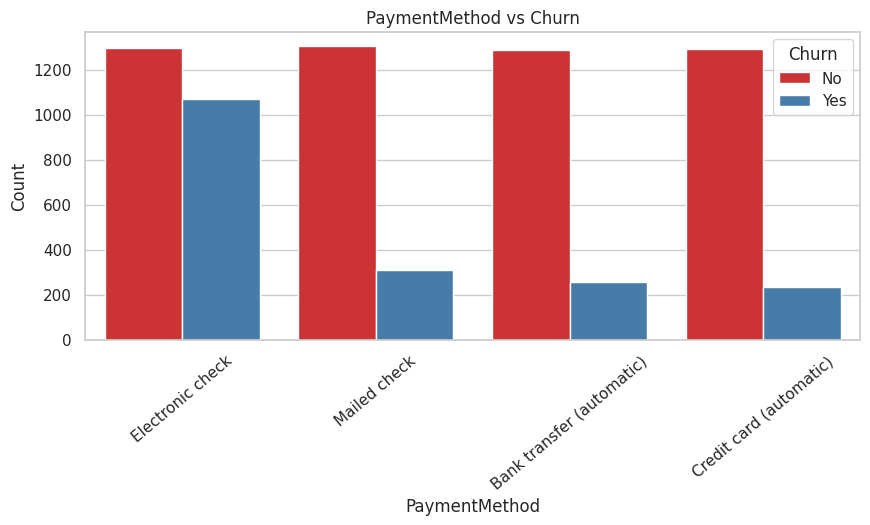


Churn percentages for: TotalCharges
Churn            No    Yes
TotalCharges              
              100.0    0.0
100.2         100.0    0.0
100.25          0.0  100.0
100.35        100.0    0.0
100.4           0.0  100.0
...             ...    ...
997.75        100.0    0.0
998.1         100.0    0.0
999.45          0.0  100.0
999.8         100.0    0.0
999.9         100.0    0.0

[6531 rows x 2 columns]


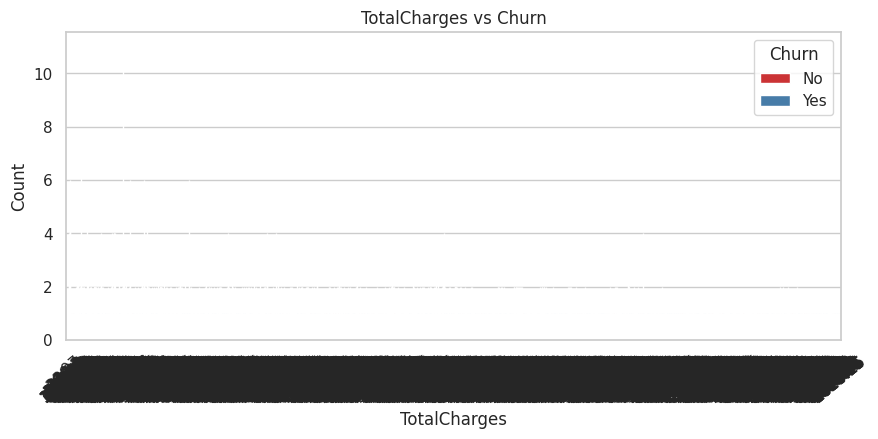


Churn percentages for: Churn
Churn     No    Yes
Churn              
No     100.0    0.0
Yes      0.0  100.0


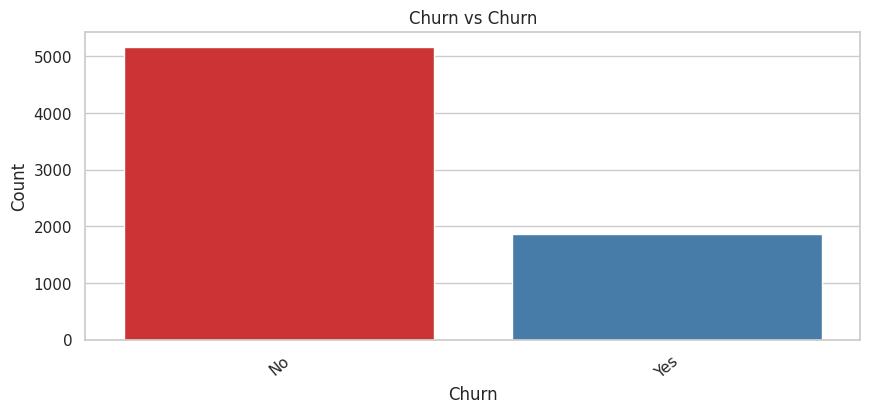

In [75]:
# Churn vs Categorical Features
for col in categorical_cols:
    # Create percentage table for each category
    churn_percent = pd.crosstab(data[col], data['Churn'], normalize='index') * 100
    print(f"\nChurn percentages for: {col}")
    print(churn_percent)

    # Plot count with hue = Churn
    plt.figure(figsize=(10,4))
    sns.countplot(x=data[col], hue=data['Churn'], palette='Set1')

    plt.title(f"{col} vs Churn")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=40)
    plt.show()



=== Churn percentage for SeniorCitizen ===
Churn                       No        Yes
SeniorCitizen_group                      
(-0.001, 0.2]        76.393832  23.606168
(0.8, 1.0]           58.318739  41.681261


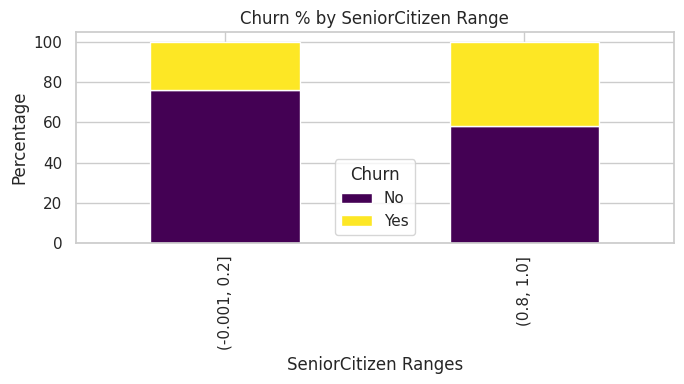


=== Churn percentage for tenure ===
Churn                  No        Yes
tenure_group                        
(-0.072, 14.4]  53.648250  46.351750
(14.4, 28.8]    73.801066  26.198934
(28.8, 43.2]    78.260870  21.739130
(43.2, 57.6]    85.005280  14.994720
(57.6, 72.0]    92.670807   7.329193


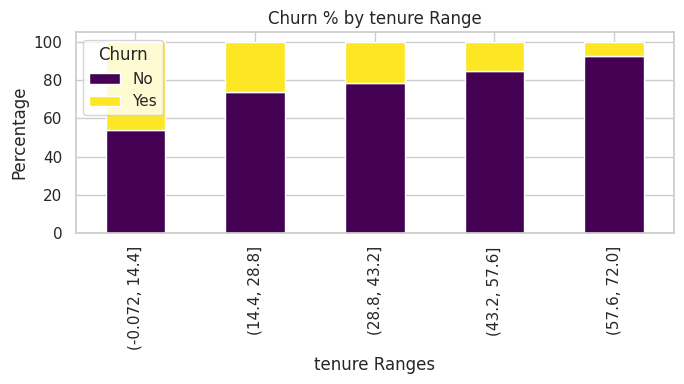


=== Churn percentage for MonthlyCharges ===
Churn                        No        Yes
MonthlyCharges_group                      
(18.15, 38.35]        88.592098  11.407902
(38.35, 58.45]        73.034826  26.965174
(58.45, 78.55]        70.519386  29.480614
(78.55, 98.65]        63.033954  36.966046
(98.65, 118.75]       69.942748  30.057252


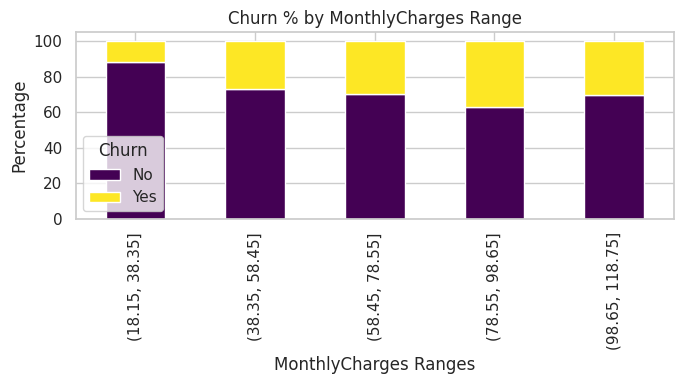

In [76]:
num_cols = [c for c in data.select_dtypes(include=['int64','float64']).columns if c != "Churn"]

for col in num_cols:
    print(f"\n=== Churn percentage for {col} ===")

    # Create 5 equal-width bins
    data[f"{col}_group"] = pd.cut(data[col], bins=5)

    # Churn percentage table
    churn_by_bin = pd.crosstab(data[f"{col}_group"], data['Churn'], normalize='index') * 100
    print(churn_by_bin)

    # Plot
    churn_by_bin.plot(kind="bar", stacked=True, figsize=(7,4), colormap="viridis")
    plt.title(f"Churn % by {col} Range")
    plt.xlabel(f"{col} Ranges")
    plt.ylabel("Percentage")
    plt.legend(title="Churn")
    plt.tight_layout()
    plt.show()

    # Drop temporary column
    data.drop(columns=[f"{col}_group"], inplace=True)

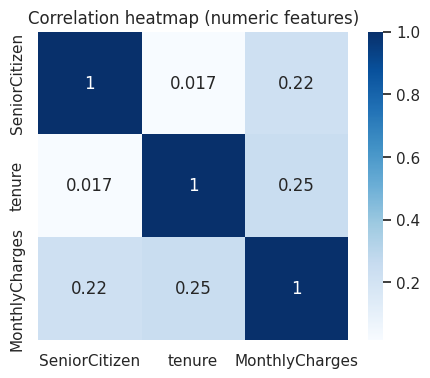

In [77]:
# Handle the new NaN values (for EDA, we can just drop them)
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap

plt.figure(figsize=(5, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap="Blues")
plt.title("Correlation heatmap (numeric features)")
plt.show()


#**Data Preprocessing**

In [78]:
data = pd.read_csv(path)
# Shape before duplicate drop
print("Shape before duplicate drop:", data.shape)
print()
data = data.drop_duplicates()
# Shape after duplicate drop
print("Shape after duplicate drop:", data.shape)

Shape before duplicate drop: (7043, 21)

Shape after duplicate drop: (7043, 21)


In [79]:
#Identify categorical & numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


Prepare dataframe for modelling

In [80]:
# Remove customerID bcz is not usefull for prediction
data.drop("customerID", axis=1, inplace=True)

In [81]:
print(data.shape)

(7043, 20)


In [82]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [83]:
#Identify categorical & numerical columns
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

print("Categorical:", cat_cols)
print("Numerical:", num_cols)

Categorical: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')
Numerical: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


In [84]:
# Convert TotalCharges to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")

In [85]:
# Correctly count NaN values
nan_count = data["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")

NaN values in TotalCharges: 11


In [86]:
# Fill missing TotalCharges with median value
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

In [87]:
print(data.shape)

(7043, 20)


In [88]:
# Correctly count NaN values
nan_count = data["TotalCharges"].isna().sum()
print(f"NaN values in TotalCharges: {nan_count}")

NaN values in TotalCharges: 0


Encode target variable

In [89]:
labeler = LabelEncoder()
data["Churn"] = labeler.fit_transform(data["Churn"])

# Quick check
print(data["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [90]:
print(data.shape)
data.head()

(7043, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [91]:
# Removing target from X
X = data.drop('Churn', axis=1)
y = data['Churn']

In [92]:
# Convert categorical columns into dummy variables
# One-Hot Encoding
X = pd.get_dummies(X, drop_first=True)
print(X.shape)
X.head()

(7043, 30)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


# **Model Training**

In [93]:
!pip install imbalanced-learn

In [94]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_resampled.value_counts())

Before SMOTE: Churn
0    5174
1    1869
Name: count, dtype: int64
After SMOTE: Churn
0    5174
1    5174
Name: count, dtype: int64


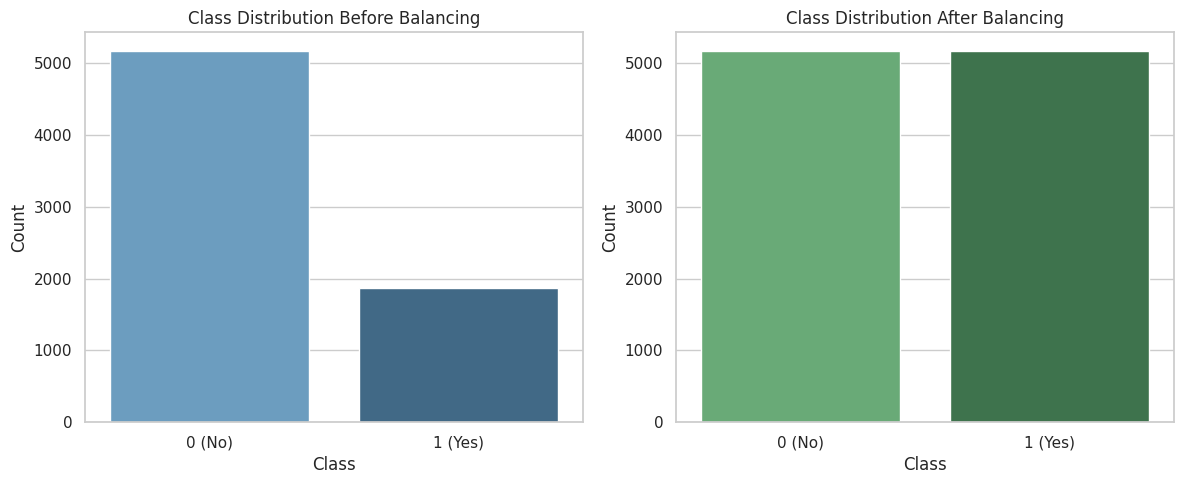

In [105]:
# BEFORE SMOTE distribution
before_counts = y.value_counts()

# AFTER SMOTE distribution
after_counts = y_resampled.value_counts()

plt.figure(figsize=(12,5))

# --- Before SMOTE ---
plt.subplot(1, 2, 1)
sns.barplot(
    x=before_counts.index,
    y=before_counts.values,
    hue=before_counts.index,            # REQUIRED
    palette="Blues_d",
    legend=False
)
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

# --- After SMOTE ---
plt.subplot(1, 2, 2)
sns.barplot(
    x=after_counts.index,
    y=after_counts.values,
    hue=after_counts.index,             # REQUIRED
    palette="Greens_d",
    legend=False
)
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks([0, 1], ["0 (No)", "1 (Yes)"])

plt.tight_layout()
plt.show()

In [95]:
from sklearn.model_selection import train_test_split

# 1) Split into Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled,
    test_size=0.40,
    random_state=42,
    stratify=y_resampled
)

# 2) Split Temp into Validation (20%) and Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=42,
    stratify=y_temp
)

print("Train size      :", X_train.shape)
print("Validation size :", X_val.shape)
print("Test size       :", X_test.shape)

Train size      : (6208, 30)
Validation size : (2070, 30)
Test size       : (2070, 30)


Scaling for Neural Network

In [96]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

dt_clf = DecisionTreeClassifier(
    random_state=42,
    criterion="gini",
    max_depth=6,          # limit depth to avoid overfitting
    min_samples_split=40, # need at least 40 samples to split
    min_samples_leaf=20,  # each leaf must have at least 20 samples
    class_weight=None     # or "balanced" if you want more focus on churn
)

# Train on SMOTE-resampled training data (unscaled)
dt_clf.fit(X_train, y_train)

# ---- Train set ----
# ---- Train set (use resampled data) ----
y_train_pred_dt = dt_clf.predict(X_train)
print("=== Decision Tree: TRAIN SET ===")
print(classification_report(y_train, y_train_pred_dt))
print("Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print(confusion_matrix(y_train, y_train_pred_dt))


# ---- Validation set ----
y_pred_val = dt_clf.predict(X_val)
print("\n=== Decision Tree: VALIDATION SET ===")
print(classification_report(y_val, y_pred_val))
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

# ---- Test set ----
y_pred_test = dt_clf.predict(X_test)
print("\n=== Decision Tree: TEST SET ===")
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

=== Decision Tree: TRAIN SET ===
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      3104
           1       0.82      0.81      0.81      3104

    accuracy                           0.81      6208
   macro avg       0.81      0.81      0.81      6208
weighted avg       0.81      0.81      0.81      6208

Accuracy: 0.8113724226804123
[[2538  566]
 [ 605 2499]]

=== Decision Tree: VALIDATION SET ===
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1035
           1       0.80      0.80      0.80      1035

    accuracy                           0.80      2070
   macro avg       0.80      0.80      0.80      2070
weighted avg       0.80      0.80      0.80      2070

Accuracy: 0.7990338164251207
[[830 205]
 [211 824]]

=== Decision Tree: TEST SET ===
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1035
           1       0.78 

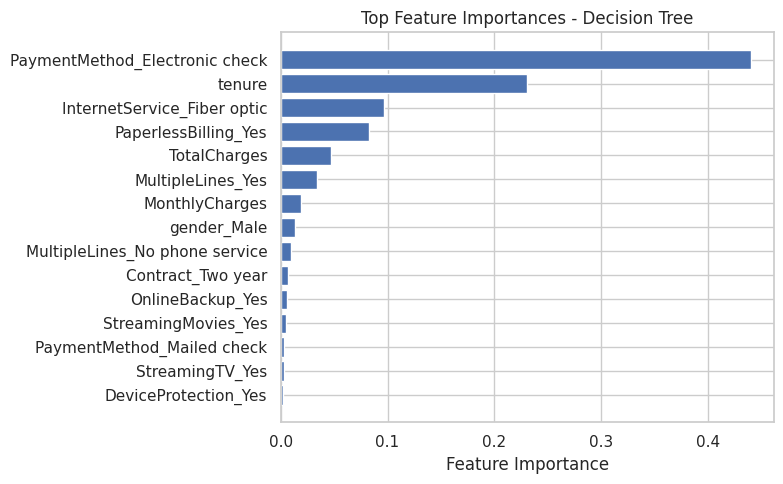

In [98]:
import numpy as np

# If X is your original (encoded) feature DataFrame:
feature_names = X.columns   # Make sure X is the same feature set used before SMOTE

importances = dt_clf.feature_importances_
indices = np.argsort(importances)[::-1]  # sort descending

top_n = 15  # show top 15 features
top_idx = indices[:top_n]

plt.figure(figsize=(8, 5))
plt.barh(range(len(top_idx)), importances[top_idx][::-1])
plt.yticks(range(len(top_idx)), feature_names[top_idx][::-1])
plt.xlabel("Feature Importance")
plt.title("Top Feature Importances - Decision Tree")
plt.tight_layout()
plt.show()

In [99]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_dim = X_train_scaled.shape[1]

nn_model = Sequential([
    Input(shape=(input_dim,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stop],
    verbose=0
)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ---- TRAIN predictions ----
train_prob = nn_model.predict(X_train_scaled)
train_pred = (train_prob >= 0.5).astype(int)
print("=== Neural Network: TRAIN SET ===")
print(classification_report(y_train, train_pred))
print("Accuracy:", accuracy_score(y_train, train_pred))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_pred))

# ---- VALIDATION predictions ----
val_prob = nn_model.predict(X_val_scaled)
val_pred = (val_prob >= 0.5).astype(int)
print("\n=== Neural Network: VALIDATION SET ===")
print(classification_report(y_val, val_pred))
print("Accuracy:", accuracy_score(y_val, val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, val_pred))

# ---- TEST predictions ----
test_prob = nn_model.predict(X_test_scaled)
test_pred = (test_prob >= 0.5).astype(int)
print("\n=== Neural Network: TEST SET ===")
print(classification_report(y_test, test_pred))
print("Accuracy:", accuracy_score(y_test, test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_pred))

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
=== Neural Network: TRAIN SET ===
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3104
           1       0.86      0.88      0.87      3104

    accuracy                           0.87      6208
   macro avg       0.87      0.87      0.87      6208
weighted avg       0.87      0.87      0.87      6208

Accuracy: 0.8688788659793815
Confusion Matrix:
 [[2654  450]
 [ 364 2740]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

=== Neural Network: VALIDATION SET ===
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1035
           1       0.82      0.84      0.83      1035

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070

Accuracy: 0.8246376811594203
Confusion Matrix:
 [[841 194]
 [169 866]]
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

=== Ne

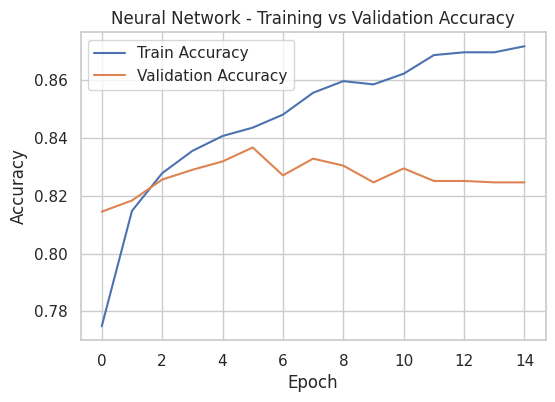

In [100]:
#plot NN training vs validation accuracy
plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network - Training vs Validation Accuracy')
plt.legend()
plt.show()

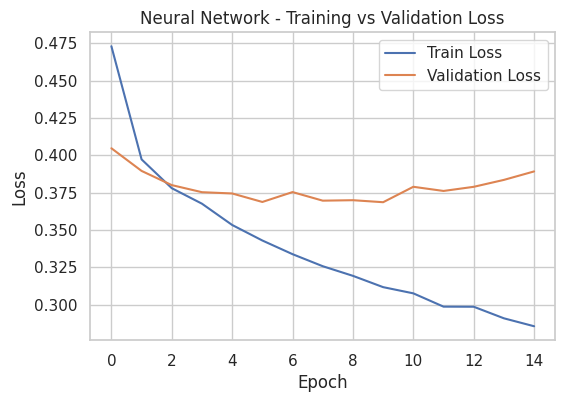

In [101]:
# Neural network training vs validation loss graph
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Neural Network - Training vs Validation Loss')
plt.legend()
plt.show()

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


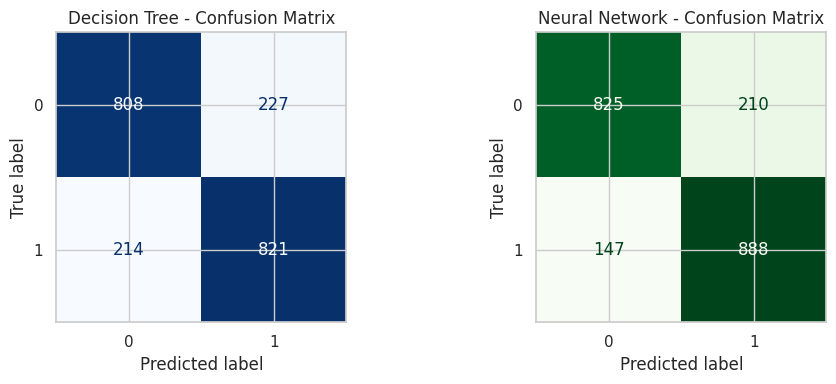

In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# ---- Predictions for test set ----
y_test_pred_dt = dt_clf.predict(X_test)           # Decision Tree
test_prob = nn_model.predict(X_test_scaled)       # NN probabilities
y_test_pred_nn = (test_prob >= 0.5).astype(int)   # NN class labels

# ---- Confusion matrices ----
cm_dt = confusion_matrix(y_test, y_test_pred_dt)
cm_nn = confusion_matrix(y_test, y_test_pred_nn)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Decision Tree confusion matrix
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=[0, 1])
disp_dt.plot(ax=axes[0], cmap="Blues", colorbar=False)
axes[0].set_title("Decision Tree - Confusion Matrix")

# Neural Network confusion matrix
disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=[0, 1])
disp_nn.plot(ax=axes[1], cmap="Greens", colorbar=False)
axes[1].set_title("Neural Network - Confusion Matrix")

plt.tight_layout()
plt.show()

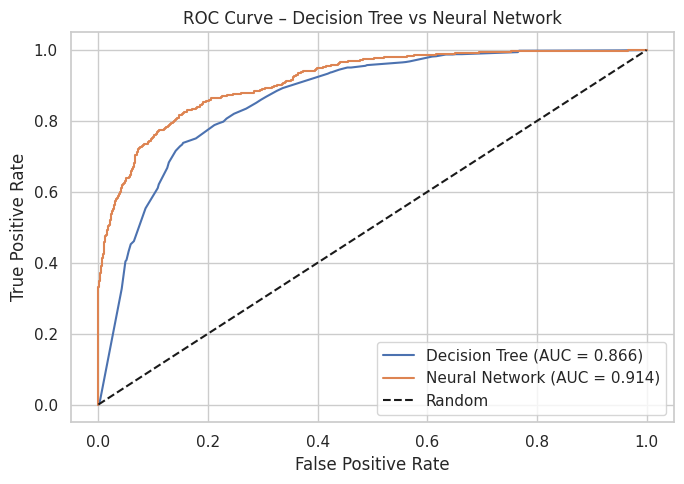

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score

# ---- Decision Tree probabilities ----
dt_test_proba = dt_clf.predict_proba(X_test)[:, 1]

# ---- Neural Network probabilities (we already computed test_prob above) ----
nn_test_proba = test_prob.ravel()   # flatten to 1D

# ROC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_test_proba)
auc_dt = roc_auc_score(y_test, dt_test_proba)

# ROC for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_test_proba)
auc_nn = roc_auc_score(y_test, nn_test_proba)

plt.figure(figsize=(7, 5))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Network (AUC = {auc_nn:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree vs Neural Network")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

            Model  Accuracy  Precision    Recall  F1-score
0   Decision Tree  0.786957   0.783397  0.793237  0.788286
1  Neural Network  0.827536   0.808743  0.857971  0.832630


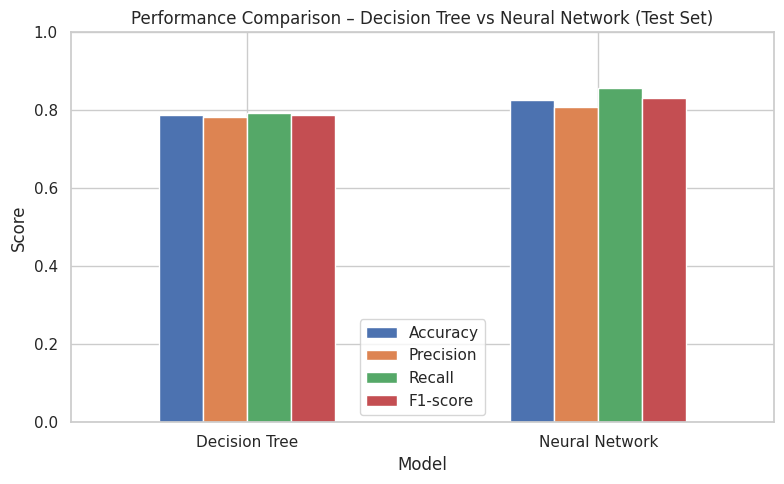

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ----- Decision Tree metrics -----
acc_dt  = accuracy_score(y_test, y_test_pred_dt)
prec_dt = precision_score(y_test, y_test_pred_dt)
rec_dt  = recall_score(y_test, y_test_pred_dt)
f1_dt   = f1_score(y_test, y_test_pred_dt)

# ----- Neural Network metrics -----
acc_nn  = accuracy_score(y_test, y_test_pred_nn)
prec_nn = precision_score(y_test, y_test_pred_nn)
rec_nn  = recall_score(y_test, y_test_pred_nn)
f1_nn   = f1_score(y_test, y_test_pred_nn)

# Create comparison DataFrame
results_df = pd.DataFrame({
    "Model": ["Decision Tree", "Neural Network"],
    "Accuracy": [acc_dt, acc_nn],
    "Precision": [prec_dt, prec_nn],
    "Recall": [rec_dt, rec_nn],
    "F1-score": [f1_dt, f1_nn]
})

print(results_df)
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(8,5)
)
plt.ylim(0, 1)
plt.title("Performance Comparison – Decision Tree vs Neural Network (Test Set)")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
